<a href="https://colab.research.google.com/github/olamiketech/zero-to-mastery-ml/blob/master/Practical3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITNPAI1 - Practical 3 Solutions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
import numpy as np

### Download Dataset
Pytorch has a variety of built-in datasets that can easily be downloaded.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(), # NOTE We don't need to use transforms.Normalize() as the images from CIFAR10 they are already normalised.
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainset, valset = torch.utils.data.random_split(trainset, [45000, 5000])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 45911806.77it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


CIFAR10, the dataset used in today's practical consists of 60000 32x32 colour images in 10 classes. These are split into 50000 training images, and 10000 testing images.

### Show Example Images

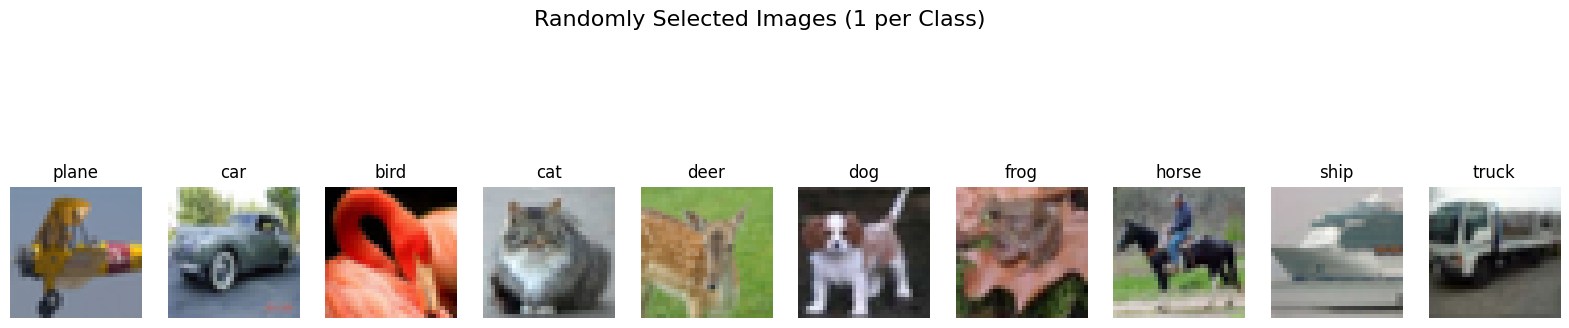

In [ ]:
class_indices = {class_name: [] for class_name in classes}
for i in range(len(trainset)):
    _, label = trainset[i]
    class_indices[classes[label]].append(i)

selected_indices = []
for class_name, indices in class_indices.items():
    selected_index = random.choice(indices)
    selected_indices.append(selected_index)

# Plot the selected images
fig, axs = plt.subplots(1, 10, figsize=(20, 5))
fig.suptitle('Randomly Selected Images (1 per Class)', fontsize=16)

for i, idx in enumerate(selected_indices):
    image, label = trainset[idx]
    axs[i].imshow(image.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C)
    axs[i].set_title(classes[label])
    axs[i].axis('off')

plt.show()

### Define LeNet Model

In [ ]:

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = LeNet()

### Define loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train Model

[1,  2000] loss: 0.660
[1,  4000] loss: 0.711
[1,  6000] loss: 0.724
[1,  8000] loss: 0.740
[1, 10000] loss: 0.781

Epoch 1:
 - Training loss: 0.7314
 - Training accuracy: 73.9689

Accuracy of the network on the 5000 validation images: 56.700 %
[2,  2000] loss: 0.638
[2,  4000] loss: 0.720
[2,  6000] loss: 0.711
[2,  8000] loss: 0.747
[2, 10000] loss: 0.742

Epoch 2:
 - Training loss: 0.7166
 - Training accuracy: 74.4400

Accuracy of the network on the 5000 validation images: 57.120 %
[3,  2000] loss: 0.634
[3,  4000] loss: 0.679
[3,  6000] loss: 0.684
[3,  8000] loss: 0.724
[3, 10000] loss: 0.709

Epoch 3:
 - Training loss: 0.6942
 - Training accuracy: 75.3689

Accuracy of the network on the 5000 validation images: 57.100 %
[4,  2000] loss: 0.627
[4,  4000] loss: 0.675
[4,  6000] loss: 0.697
[4,  8000] loss: 0.728
[4, 10000] loss: 0.730

Epoch 4:
 - Training loss: 0.6990
 - Training accuracy: 75.0200

Accuracy of the network on the 5000 validation images: 55.100 %
[5,  2000] loss: 0.6

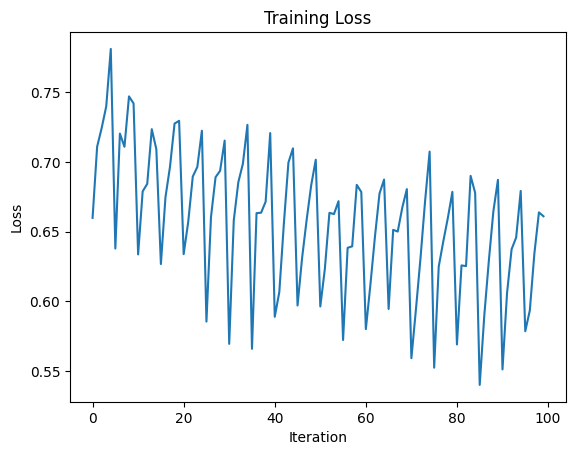

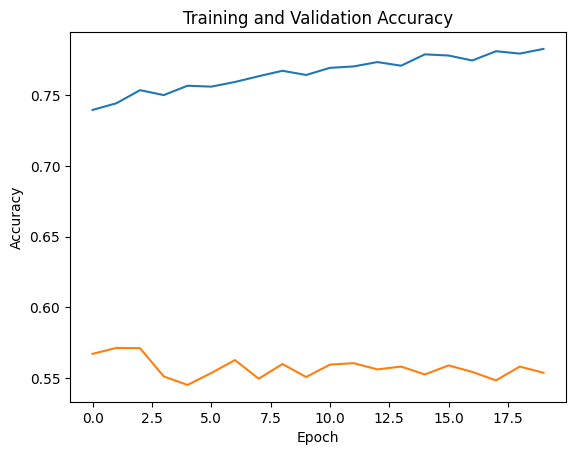

In [ ]:
num_epochs = 20
losses = []
accuracies = []
val_accuracies = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    epoch_loss = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()
        total += labels.size(0)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss / 2000)
            running_loss = 0.0
    epoch_loss = epoch_loss / len(trainloader)
    epoch_accuracy = correct / total
    accuracies.append(epoch_accuracy)
    print(f"\nEpoch {epoch+1}:")
    print(f" - Training loss: {epoch_loss:.4f}")
    print(f" - Training accuracy: {epoch_accuracy*100:.4f}\n")

    val_correct = 0
    val_total = 0
    net.eval()
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            true_labels.extend(labels.tolist())
            predicted_labels.extend(predicted.tolist())
    val_accuracies.append(val_correct / val_total)
    print('Accuracy of the network on the 5000 validation images: %.3f %%' % (
        100 * val_correct / val_total))

print('Finished Training')
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Model Testing

In [ ]:
# Test the network on test data
correct = 0
total = 0
net.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels.extend(labels.tolist())
        predicted_labels.extend(predicted.tolist())

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


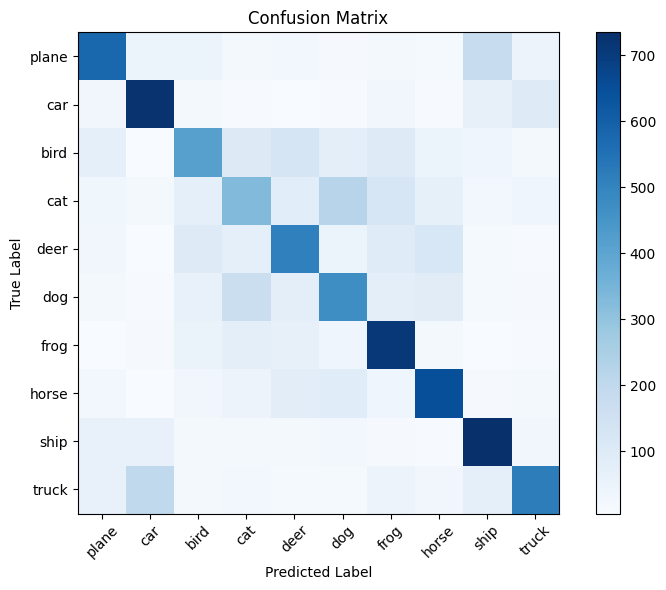

In [ ]:
def plot_confusion_matrix(true_labels,predicted_labels, classes):
  # Compute confusion matrix
  conf_matrix = confusion_matrix(true_labels, predicted_labels)

  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.tight_layout()

  plt.show()

plot_confusion_matrix (true_labels, predicted_labels, classes)

### Altered LeNet Model


In [ ]:

class AlteredLeNet(nn.Module):
    def __init__(self):
        super(AlteredLeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 1024)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024,1024)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(1024, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x
net = AlteredLeNet()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.7, weight_decay=1e-4)


[1,  2000] loss: 2.302
[1,  4000] loss: 2.292
[1,  6000] loss: 2.213
[1,  8000] loss: 2.113
[1, 10000] loss: 1.973

Epoch 1:
 - Training loss: 2.1431
 - Training accuracy: 19.3289

Accuracy of the network on the 5000 validation images: 36.800 %
[2,  2000] loss: 1.740
[2,  4000] loss: 1.647
[2,  6000] loss: 1.576
[2,  8000] loss: 1.561
[2, 10000] loss: 1.516

Epoch 2:
 - Training loss: 1.5918
 - Training accuracy: 42.5289

Accuracy of the network on the 5000 validation images: 45.960 %
[3,  2000] loss: 1.458
[3,  4000] loss: 1.431
[3,  6000] loss: 1.425
[3,  8000] loss: 1.400
[3, 10000] loss: 1.402

Epoch 3:
 - Training loss: 1.4156
 - Training accuracy: 49.5400

Accuracy of the network on the 5000 validation images: 49.480 %
[4,  2000] loss: 1.327
[4,  4000] loss: 1.306
[4,  6000] loss: 1.324
[4,  8000] loss: 1.298
[4, 10000] loss: 1.304

Epoch 4:
 - Training loss: 1.3087
 - Training accuracy: 53.5000

Accuracy of the network on the 5000 validation images: 53.080 %
[5,  2000] loss: 1.2

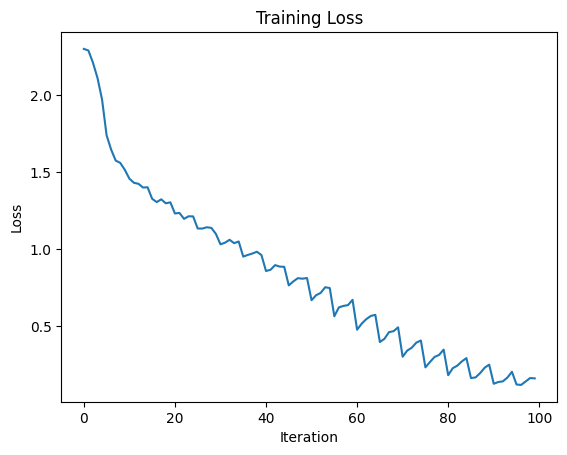

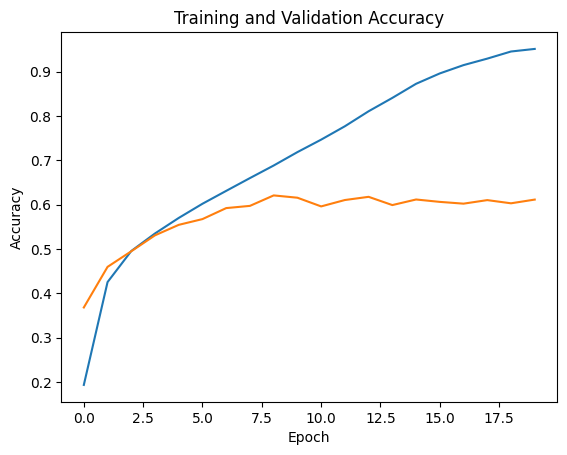

In [ ]:
num_epochs = 20
losses = []
accuracies = []
val_accuracies = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    epoch_loss = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()
        total += labels.size(0)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss / 2000)
            running_loss = 0.0
    epoch_loss = epoch_loss / len(trainloader)
    epoch_accuracy = correct / total
    accuracies.append(epoch_accuracy)
    print(f"\nEpoch {epoch+1}:")
    print(f" - Training loss: {epoch_loss:.4f}")
    print(f" - Training accuracy: {epoch_accuracy*100:.4f}\n")

    val_correct = 0
    val_total = 0
    net.eval()
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            true_labels.extend(labels.tolist())
            predicted_labels.extend(predicted.tolist())
    val_accuracies.append(val_correct / val_total)
    print('Accuracy of the network on the 5000 validation images: %.3f %%' % (
        100 * val_correct / val_total))

print('Finished Training')
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Test the network on test data
correct = 0
total = 0
net.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels.extend(labels.tolist())
        predicted_labels.extend(predicted.tolist())

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


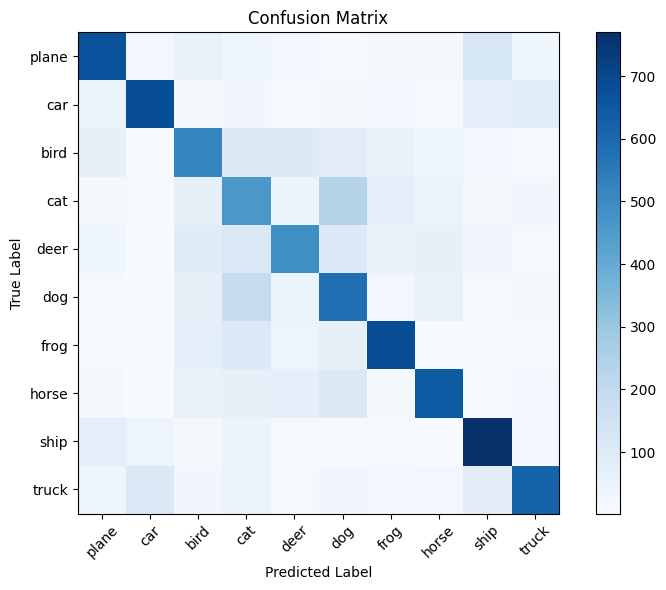

In [ ]:
def plot_confusion_matrix(true_labels,predicted_labels, classes):
  # Compute confusion matrix
  conf_matrix = confusion_matrix(true_labels, predicted_labels)

  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.tight_layout()

  plt.show()

plot_confusion_matrix (true_labels, predicted_labels, classes)